In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.patches as  mpatches
from matplotlib.lines import Line2D
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

/opt/homebrew/Caskroom/miniconda/base/envs/subhalos/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
plt.style.use('../../notebooks/paper/paper.mplstyle')
double_textwidth = 7.1 #inches
single_textwidth = 3.5 #inches

In [4]:
fixed = [False, True, False, False, True, False]
fid_values = [2.0, 0.2]

In [5]:
mock_1_100 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_1/Nhost_100/chain.h5", fixed=fixed, Nburn=40000, Nthin=15)
mock_1_1000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_1/Nhost_1000/chain.h5", fixed=fixed, Nburn=2500, Nthin=15)
mock_1_10000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_1/Nhost_10000/chain.h5", fixed=fixed, Nburn=1000, Nthin=15)

In [6]:
mock_2_100 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_2/Nhost_100/chain.h5", fixed=fixed, Nburn=40000, Nthin=15)
mock_2_1000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_2/Nhost_1000/chain.h5", fixed=fixed, Nburn=2500, Nthin=15)
mock_2_10000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_2/Nhost_10000/chain.h5", fixed=fixed, Nburn=1000, Nthin=15)

In [7]:
mock_3_100 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_3/Nhost_100/chain.h5", fixed=fixed, Nburn=40000, Nthin=15)
mock_3_1000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_3/Nhost_1000/chain.h5", fixed=fixed, Nburn=2500, Nthin=15)
mock_3_10000 = jsm_mcmc.Chain("../../mcmc/inference_tests/convergence/mock_3/Nhost_10000/chain.h5", fixed=fixed, Nburn=1000, Nthin=15)

In [8]:
labels = ["$\hat{N}_{\mathrm{host}} = 10^4$", "$\hat{N}_{\mathrm{host}} = 10^4$", "$\hat{N}_{\mathrm{host}} = 10^4$",
          "$\hat{N}_{\mathrm{host}} = 10^3$", "$\hat{N}_{\mathrm{host}} = 10^3$", "$\hat{N}_{\mathrm{host}} = 10^3$", 
          "$\hat{N}_{\mathrm{host}} = 10^2$", "$\hat{N}_{\mathrm{host}} = 10^2$", "$\hat{N}_{\mathrm{host}} = 10^2$"]

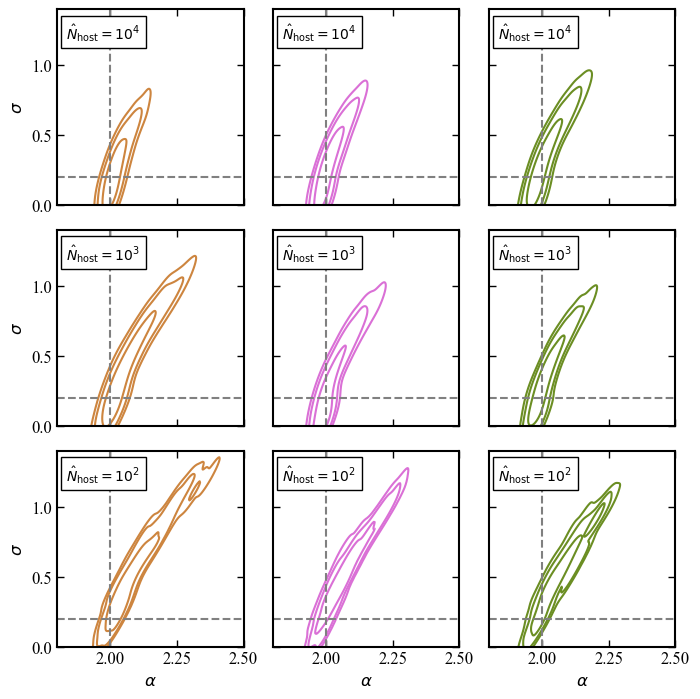

In [9]:
# Generate some random 2D data for demonstration
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(double_textwidth, double_textwidth))

#mock1 x 10000
sns.kdeplot(x=mock_1_10000.clean[:, 0], y=mock_1_10000.clean[:, 1], ax=axes[0,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")
#mock1 x 1000
sns.kdeplot(x=mock_1_1000.clean[:, 0], y=mock_1_1000.clean[:, 1], ax=axes[1,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")
#mock1 x 100
sns.kdeplot(x=mock_1_100.clean[:, 0], y=mock_1_100.clean[:, 1], ax=axes[2,0], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="peru")

#mock2 x 10000
sns.kdeplot(x=mock_2_10000.clean[:, 0], y=mock_2_10000.clean[:, 1], ax=axes[0,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
#mock2 x 1000
sns.kdeplot(x=mock_2_1000.clean[:, 0], y=mock_2_1000.clean[:, 1], ax=axes[1,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")
#mock2 x 100
sns.kdeplot(x=mock_2_100.clean[:, 0], y=mock_2_100.clean[:, 1], ax=axes[2,1], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="orchid")

#mock_3 x 10000
sns.kdeplot(x=mock_3_10000.clean[:, 0], y=mock_3_10000.clean[:, 1], ax=axes[0,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="olivedrab")
#mock_3 x 1000
sns.kdeplot(x=mock_3_1000.clean[:, 0], y=mock_3_1000.clean[:, 1], ax=axes[1,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="olivedrab")
#mock_3 x 100
sns.kdeplot(x=mock_3_100.clean[:, 0], y=mock_3_100.clean[:, 1], ax=axes[2,2], shade=False, shade_lowest=False, levels=[1-0.99, 1-0.95, 1-0.68], bw_adjust=2, color="olivedrab")

### LABELS
for index, ax in enumerate(axes.flatten()):
    ax.axhline(0.2, ls="--", color="grey")
    ax.axvline(2.0, ls="--", color="grey")
    ax.text(0.05, 0.85, labels[index], transform=ax.transAxes, bbox=dict(facecolor='white', alpha=1, edgecolor="k"))


axes[0,0].set_ylim(0, 1.4)
axes[0,0].set_xlim(1.8, 2.5)
axes[0,0].set_ylabel("$\sigma$")
axes[1,0].set_ylabel("$\sigma$")
axes[2,0].set_ylabel("$\sigma$")

axes[2,0].set_xlabel("$\\alpha$")
axes[2,1].set_xlabel("$\\alpha$")
axes[2,2].set_xlabel("$\\alpha$")

# Adjust layout
plt.tight_layout()
#plt.savefig("../../../paper_1/figures/feature_recovery/matrix_update.pdf", bbox_inches="tight")
plt.show()


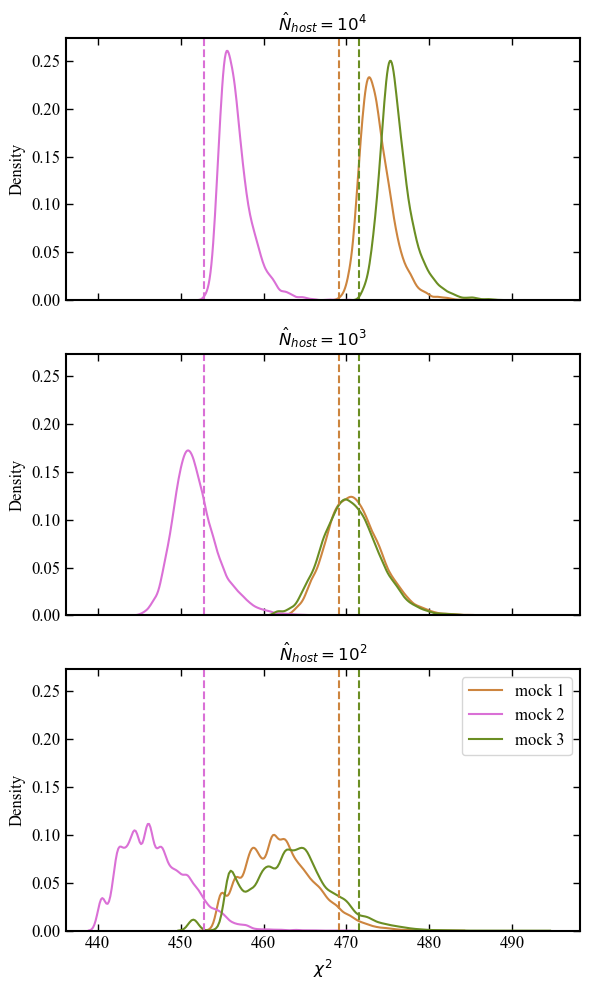

In [10]:
# Create a figure with 3 subplots (1 column, 3 rows)
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 10))

# Plot for N_host = 10^4
axs[0].set_title("$\hat{N}_{host} = 10^4$")
sns.kdeplot(mock_1_10000.chisq_thin, color="peru", ax=axs[0])
sns.kdeplot(mock_2_10000.chisq_thin, color="orchid", ax=axs[0])
sns.kdeplot(mock_3_10000.chisq_thin, color="olivedrab", ax=axs[0])
axs[0].axvline(mock_1_10000.chisq_thin.min(), color="peru", ls="--")
axs[0].axvline(mock_2_10000.chisq_thin.min(), color="orchid", ls="--")
axs[0].axvline(mock_3_10000.chisq_thin.min(), color="olivedrab", ls="--")
axs[0].set_xlabel("$\\chi^2$")

# Plot for N_host = 10^3
axs[1].set_title("$\hat{N}_{host} = 10^3$")
sns.kdeplot(mock_1_1000.chisq_thin, color="peru", ax=axs[1])
sns.kdeplot(mock_2_1000.chisq_thin, color="orchid", ax=axs[1])
sns.kdeplot(mock_3_1000.chisq_thin, color="olivedrab", ax=axs[1])
axs[1].axvline(mock_1_10000.chisq_thin.min(), color="peru", ls="--")
axs[1].axvline(mock_2_10000.chisq_thin.min(), color="orchid", ls="--")
axs[1].axvline(mock_3_10000.chisq_thin.min(), color="olivedrab", ls="--")
axs[1].set_xlabel("$\\chi^2$")

# Plot for N_host = 10^2
axs[2].set_title("$\hat{N}_{host} = 10^2$")
sns.kdeplot(mock_1_100.chisq_thin, color="peru", ax=axs[2], label="mock 1")
sns.kdeplot(mock_2_100.chisq_thin, color="orchid", ax=axs[2], label="mock 2")
sns.kdeplot(mock_3_100.chisq_thin, color="olivedrab", ax=axs[2], label="mock 3")
axs[2].axvline(mock_1_10000.chisq_thin.min(), color="peru", ls="--")
axs[2].axvline(mock_2_10000.chisq_thin.min(), color="orchid", ls="--")
axs[2].axvline(mock_3_10000.chisq_thin.min(), color="olivedrab", ls="--")
axs[2].set_xlabel("$\\chi^2$")
axs[2].legend()
# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined figure
plt.show()


In [11]:
mock1 = jsm_models.LOAD_DATA("../../mcmc/inference_tests/convergence/mock_1/Nhost_100/mock_data.npz")
mock1.get_stats(6.5, 500)

mock2 = jsm_models.LOAD_DATA("../../mcmc/inference_tests/convergence/mock_2/Nhost_100/mock_data.npz")
mock2.get_stats(6.5, 500)

mock3 = jsm_models.LOAD_DATA("../../mcmc/inference_tests/convergence/mock_3/Nhost_100/mock_data.npz")
mock3.get_stats(6.5, 500)

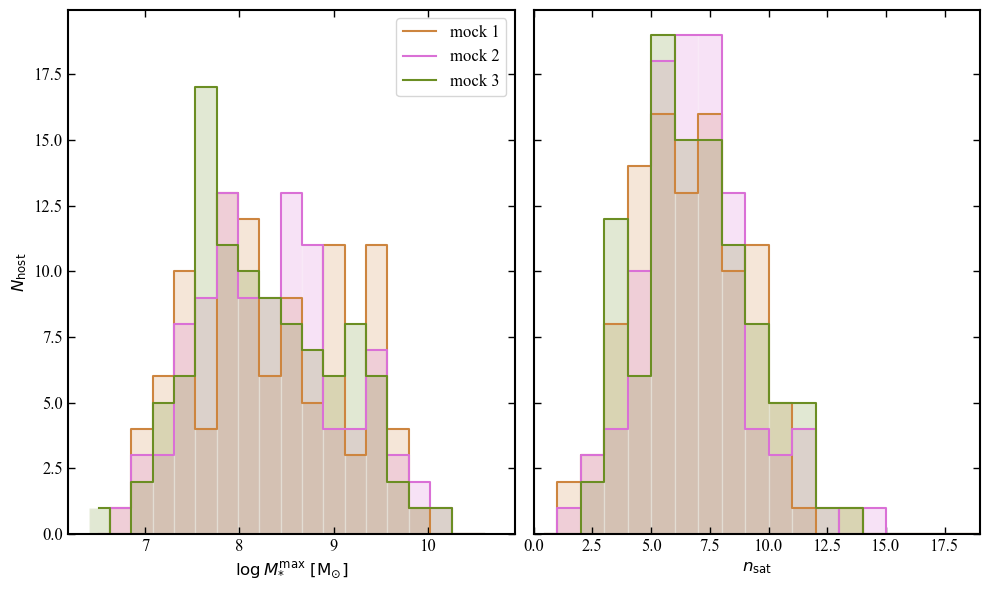

In [12]:
# Create a figure with 3 subplots (1 column, 3 rows)
fig, axs = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(10, 6))

# Plot for N_host = 10^4

max_mass_bins = np.linspace(6.4, 10.7, 20)
counts1, bincenters = jsm_stats.count(mock1.stat.maxmass, max_mass_bins, return_bins=True)
counts2 = jsm_stats.count(mock2.stat.maxmass, max_mass_bins, return_bins=False)
counts3 = jsm_stats.count(mock3.stat.maxmass, max_mass_bins, return_bins=False)

axs[0].step(bincenters, counts1, where="mid", color="peru", label="mock 1")
axs[0].hist(mock1.stat.maxmass, max_mass_bins, color="peru", alpha=0.2, edgecolor="white")

axs[0].step(bincenters, counts2, where="mid", color="orchid", label="mock 2")
axs[0].hist(mock2.stat.maxmass, max_mass_bins, color="orchid", alpha=0.2, edgecolor="white")

axs[0].step(bincenters, counts3, where="mid", color="olivedrab", label="mock 3")
axs[0].hist(mock3.stat.maxmass, max_mass_bins, color="olivedrab", alpha=0.2, edgecolor="white")

axs[0].set_xlabel("$\log M_{*}^{\mathrm{max}}\ [\mathrm{M}_{\odot}]$")
axs[0].set_ylabel("$N_{\mathrm{host}}$")
axs[0].legend()

Nsat_bins = np.linspace(0, 30, 31)
counts1, bincenters = jsm_stats.count(mock1.stat.Nsat_perhost, Nsat_bins, return_bins=True)
counts2 = jsm_stats.count(mock2.stat.Nsat_perhost, Nsat_bins, return_bins=False)
counts3 = jsm_stats.count(mock3.stat.Nsat_perhost, Nsat_bins, return_bins=False)

axs[1].step(bincenters, counts1, where="mid", color="peru")
axs[1].hist(mock1.stat.Nsat_perhost, Nsat_bins, color="peru", alpha=0.2, edgecolor="white")

axs[1].step(bincenters, counts2, where="mid", color="orchid")
axs[1].hist(mock2.stat.Nsat_perhost, Nsat_bins, color="orchid", alpha=0.2, edgecolor="white")

axs[1].step(bincenters, counts3, where="mid", color="olivedrab")
axs[1].hist(mock3.stat.Nsat_perhost, Nsat_bins, color="olivedrab", alpha=0.2, edgecolor="white")

axs[1].set_xlabel("$n_{\mathrm{sat}}$")
axs[1].set_xlim(0,19)
plt.tight_layout()